In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
from tensorflow import keras

In [4]:

# base_model = keras.applications.InceptionV3(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=10,
#     classifier_activation="softmax",
# )

# base_model = keras.applications.VGG16(
#     weights='imagenet',
#     input_shape=(None, None, 3),
#     include_top=False)

base_model = keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=10,
    classifier_activation="softmax",
)


/tmp/ipykernel_43865/1346396519.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNet(
2024-08-12 20:45:05.289495: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [28]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [6]:
base_model.treinable = False

In [7]:
inputs = keras.Input(shape=(None, None, 3))  # sem entrada fixa

x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, None, None,     │     3,228,864 │
│                                 │ 1024)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    samplewise_center=True,  # media de cada sample para 0
    rotation_range=10,  # rotação da imagem
    zoom_range=0.1,  # zoom
    width_shift_range=0.1,  # desloca horizontalmente
    height_shift_range=0.1,  # desloca verticalmente
    horizontal_flip=True,  # espelha a imagem horizontalmente
    vertical_flip=True, #espelha a imagem verticalmente
    )

 

datagen_valid = ImageDataGenerator(
    samplewise_center=True, 
    rotation_range=10,  
    zoom_range=0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=True,)

In [11]:

train_it = datagen_train.flow_from_directory(
    "../FastFoodClassificationV2/Train",
    color_mode="rgb",
    class_mode="categorical",
)

valid_it = datagen_valid.flow_from_directory(
    "../FastFoodClassificationV2/Valid",
    color_mode="rgb",
    class_mode="categorical",
)

Found 14549 images belonging to 10 classes.
Found 3478 images belonging to 10 classes.


In [12]:
history = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples//train_it.batch_size,
          validation_steps=valid_it.samples//valid_it.batch_size,
          epochs=8)

Epoch 1/8


/home/pauloricms/Documentos/avanti-bootcamp-ML/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 88/454 ━━━━━━━━━━━━━━━━━━━━ 15:42 3s/step - accuracy: 0.4715 - loss: 1.8868

/home/pauloricms/Documentos/avanti-bootcamp-ML/tensorflow/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


454/454 ━━━━━━━━━━━━━━━━━━━━ 1247s 3s/step - accuracy: 0.6022 - loss: 1.3452 - val_accuracy: 0.4936 - val_loss: 2.8582
Epoch 2/8
  1/454 ━━━━━━━━━━━━━━━━━━━━ 23:33 3s/step - accuracy: 0.6875 - loss: 0.9742

2024-08-12 21:05:59.340186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 950us/step - accuracy: 0.6875 - loss: 0.9742 - val_accuracy: 0.5455 - val_loss: 3.1190
Epoch 3/8


2024-08-12 21:05:59.726040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


454/454 ━━━━━━━━━━━━━━━━━━━━ 1520s 3s/step - accuracy: 0.7690 - loss: 0.7330 - val_accuracy: 0.6502 - val_loss: 1.4852
Epoch 4/8
  1/454 ━━━━━━━━━━━━━━━━━━━━ 28:34 4s/step - accuracy: 0.8438 - loss: 0.5213

2024-08-12 21:31:23.648255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8438 - loss: 0.5213 - val_accuracy: 0.4545 - val_loss: 2.4246
Epoch 5/8


2024-08-12 21:31:24.174758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


454/454 ━━━━━━━━━━━━━━━━━━━━ 1761s 4s/step - accuracy: 0.8176 - loss: 0.6034 - val_accuracy: 0.7543 - val_loss: 0.8979
Epoch 6/8
  1/454 ━━━━━━━━━━━━━━━━━━━━ 23:37 3s/step - accuracy: 0.8750 - loss: 0.4246

2024-08-12 22:00:47.850371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 972us/step - accuracy: 0.8750 - loss: 0.4246 - val_accuracy: 0.7273 - val_loss: 0.8012
Epoch 7/8


2024-08-12 22:00:48.271566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


454/454 ━━━━━━━━━━━━━━━━━━━━ 1745s 4s/step - accuracy: 0.8365 - loss: 0.5309 - val_accuracy: 0.7471 - val_loss: 0.9973
Epoch 8/8
  1/454 ━━━━━━━━━━━━━━━━━━━━ 24:04 3s/step - accuracy: 0.8438 - loss: 0.2856

2024-08-12 22:29:56.702954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 893us/step - accuracy: 0.8438 - loss: 0.2856 - val_accuracy: 0.6818 - val_loss: 1.0892


2024-08-12 22:29:57.094200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


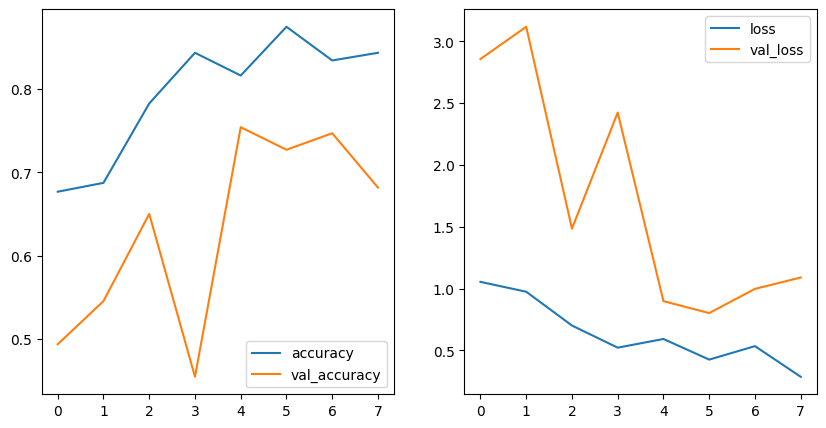

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
fig, ax = plt.subplots(1,2, figsize=(10,5))
for i, radical in enumerate(['accuracy', 'loss']):
    for prefix in ['', 'val_']:
        ax[i].plot(history.history[prefix+radical], label = prefix+radical)
    ax[i].legend()
    # ax[i].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))